### Previsão de Preços de Casas
#### Construir um modelo de machine learning para prever preços de casas com base em suas características.

In [4]:
# A obtenção do conjunto de dados
# vamos utilizar o conjunto de dados de preços de casas da Califórnia disponível diretamente através do Scikit-learn

# Importando o conjunto de dados
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing


In [6]:
# Carregando o conjunto de dados de preços de casas da Califórnia
california_housing = fetch_california_housing()

In [7]:
# Transformando o conjunto de dados em um DataFrame do pandas para facilitar a manipulação
# MedHouseVal é a variável resposta (preço médio das casas), alvo da predição
df_california = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
df_california['MedHouseVal'] = california_housing.target

In [8]:
# Exibindo as primeiras linhas do DataFrame para verificação
df_california.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [9]:
# Conjunto de dados foi carregado
# Próxima etapa é a análise exploratória dos dados e preparar os dados
# Vamos realizar algumas análises exploratórias para entender melhor o conjunto de dados
# Vamos verificar se existem valores ausentes no conjunto de dados e obter algumas estatísticas descritivas

# Exploração Inicial dos Dados

# Dimensões do DataFrame

print("Dimensões do DataFrame:", df_california.shape)

Dimensões do DataFrame: (20640, 9)


In [10]:
# Informações gerais sobre os tipos de dados e valores ausentes
print("\nInformações do DataFrame:")
df_california.info()


Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [11]:
# Verificação de Valores Ausentes
print("\nValores Ausentes por Coluna:")
print(df_california.isnull().sum())


Valores Ausentes por Coluna:
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


C:\Users\aaron\AppData\Local\Temp\ipykernel_16144\3729997562.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_california['MedHouseVal'], bins=50)


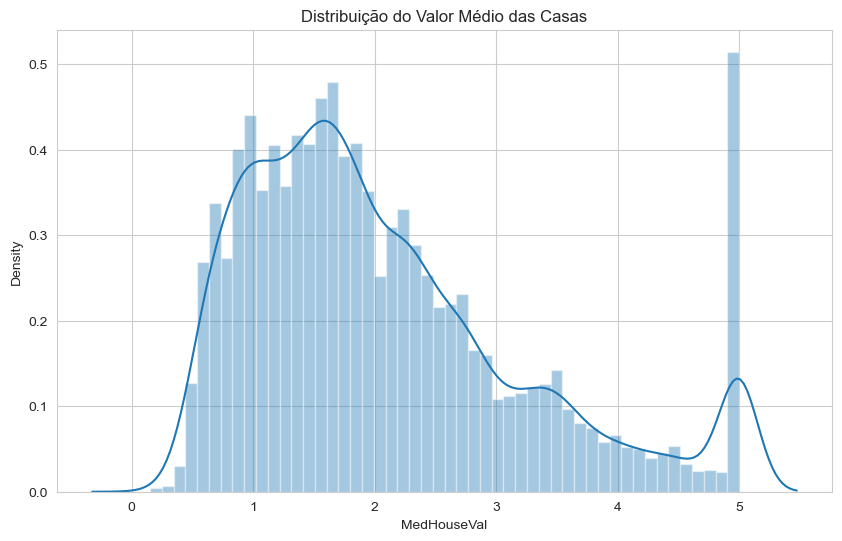

In [12]:
# Visualização Inicial dos Dados
# Vamos visualizar a distribuição de algumas das variáveis principais e a relação entre elas e o valor médio das casas.

# Importando as bibliotecas necessárias para visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações de visualização
sns.set_style('whitegrid')

# Histograma da variável alvo 'MedHouseVal'
plt.figure(figsize=(10,6))
sns.distplot(df_california['MedHouseVal'], bins=50)
plt.title('Distribuição do Valor Médio das Casas')
plt.show()

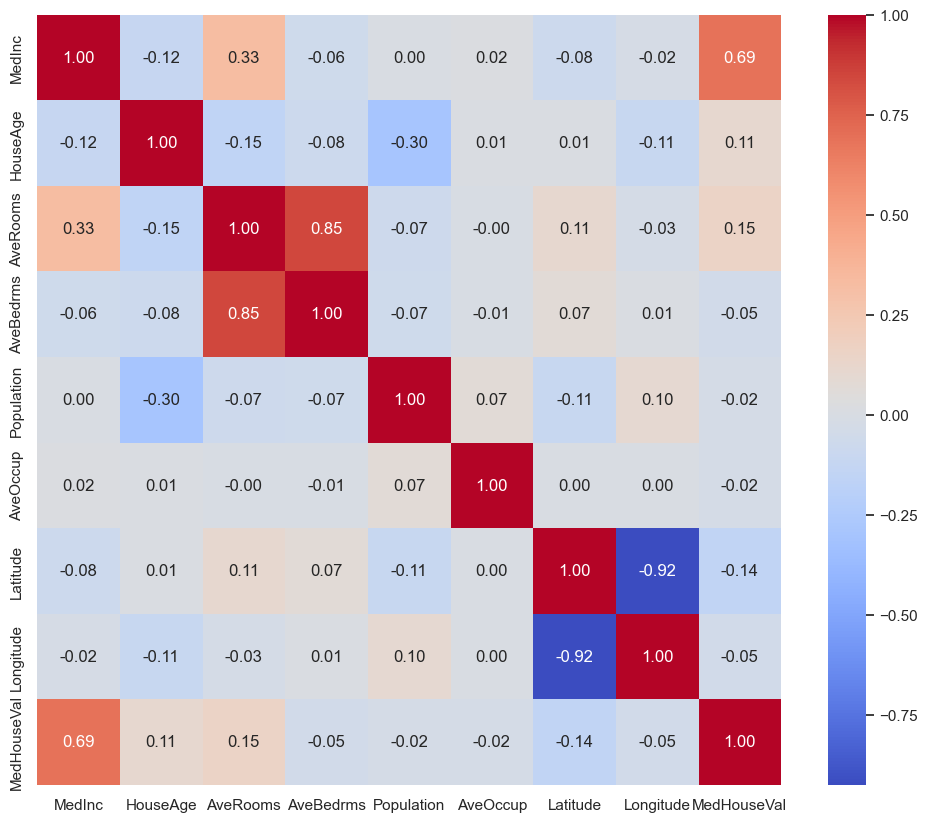

In [14]:
# Segunda etapa, a análise exploratória de dados (EDA)
# Vamos analisar a relação entre as variáveis e o valor médio das casas

# Queremos entender como as diferentes características da casa estão relacionadas entre si e com o valor médio das casas
# Vamos verificar a correlação entre as variáveis

# Correlação entre as variáveis

# Calculando a matriz de correlação
correlation_matrix = df_california.corr()

# Usando seaborn para criar um heatmap
sns.set(style="white")
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

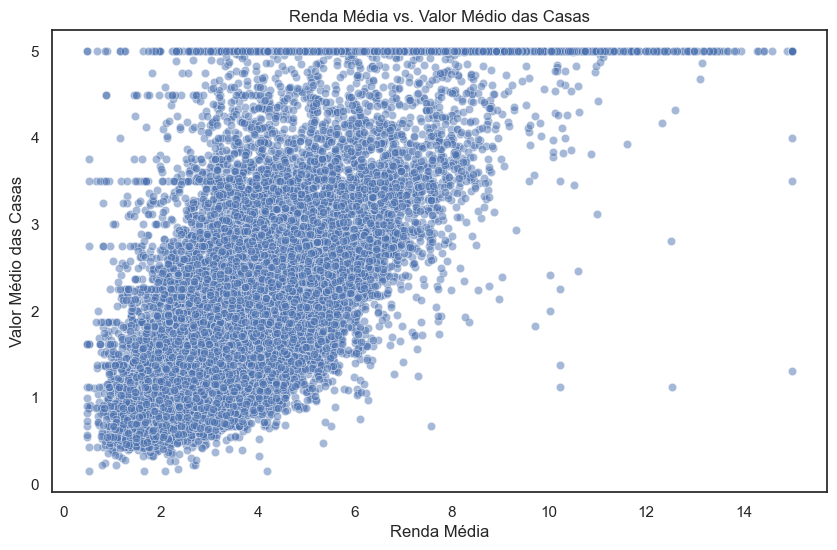

In [16]:
# Visualizações de Relações
# Depois de examinar a correlação, podemos querer olhar mais de perto para algumas das relações chave usando gráficos de dispersão.
# Gráfico de dispersão para as variáveis com maior correlação com 'MedHouseVal'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MedInc', y='MedHouseVal', data=df_california, alpha=0.5)
plt.title('Renda Média vs. Valor Médio das Casas')
plt.xlabel('Renda Média')
plt.ylabel('Valor Médio das Casas')
plt.show()